# 0. ライブラリの読み込み

In [2]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 回帰問題

## 1) データの準備

In [ ]:
# pandasで表計算のデータを読み込む
df = pd.read_csv('/content/drive/MyDrive/Telakoya/tela4/data/boston.csv')
df

In [10]:
# 説明変数と目的変数に分離し、numpyに変換
x = df.iloc[:, :-1].values
t = df.iloc[:, -1].values

In [12]:
# 学習データと検証データに分離する
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

## 2) 機械学習の実行

In [13]:
# 機械学習　回帰問題
# ①　モデルの読み込み　(モデルの設計図)
from sklearn.linear_model import LinearRegression
# ②　モデルのインタンス化 (モデルの活性化)
model = LinearRegression()
# ③　モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [14]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [15]:
# モデルの評価 (決定係数)
model.score(x_test, t_test)

0.6733825506400171

In [ ]:
# モデルによる予測値
pred = model.predict(x_test)
pred

In [ ]:
t_test

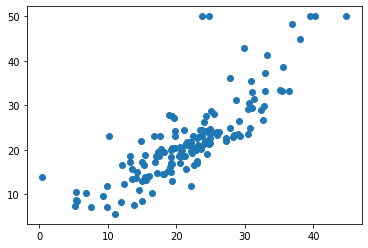

In [18]:
# 散布図による予測値の図示
plt.scatter(pred, t_test)

## 3) モデルの保存と復元

In [19]:
# モデルの保存
import pickle
with open('/content/drive/MyDrive/Telakoya/tela4/model/boston.pickle', mode = 'wb') as f:
    pickle.dump(model, f)

In [21]:
# モデルの復元
import pickle
with open('/content/drive/MyDrive/Telakoya/tela4/model/boston.pickle', mode = 'rb') as f:
    model2 = pickle.load(f)

In [ ]:
pred2 = model2.predict(x_test)
pred2

In [ ]:
pred == pred2

# 2. 分類問題

## 1) データの読み込み

In [25]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/Telakoya/tela4/data/breast.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [26]:
# 説明変数と目的変数に分離し、numpyに変換
x = df.iloc[:, :-1].values
t = df.iloc[:, -1].values

In [27]:
# 学習データと検証データに分離する
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

## 2) 機械学習の実行

In [ ]:
# 機械学習　分類問題
# ①　モデルの読み込み　(モデルの設計図)
from sklearn.linear_model import LinearRegression
# ②　モデルのインタンス化 (モデルの活性化)
model = LinearRegression()
# ③　モデルの学習
model.fit(x_train, t_train)

In [ ]:
model.coef_

In [48]:
# モデルによる予測値
pred = model.predict(x_test)
pred

array([ 0.17707448,  0.81987521,  0.97355174,  0.80617575,  0.95612818,
        0.91307933,  1.05724419,  0.97540301,  1.1058957 ,  1.07483318,
        0.70965109,  0.78509148,  1.27354914,  0.69950266,  0.63289002,
        0.18562744,  1.00352805,  0.10225937,  0.10320654, -0.17380385,
        0.03629234,  0.33200236,  0.82884983,  0.97922469,  0.23465956,
        0.92776417,  1.09722388,  0.36150762,  0.93493157,  0.02001526,
        1.0277572 ,  0.15535754,  0.66951523,  0.41607532,  1.29633559,
        0.10850394,  0.7200238 ,  0.32102958,  0.79752284, -0.01729324,
        0.42169619,  1.11996192,  0.49338782,  1.17670755,  0.58756646,
       -0.28051446,  1.36245457,  0.81742217,  0.99115109, -0.03571308,
        0.47931952,  0.65447029,  0.1667618 ,  0.92046487,  0.96293178,
        0.92058183,  1.07412067,  0.8019246 ,  0.8443541 , -0.01532489,
        0.08743167,  0.17269978,  1.13609622,  0.8923627 ,  0.03085382,
        0.72910668, -0.59037602, -0.2485057 ,  0.1487008 ,  1.01

In [37]:
x1 = x_test[0]
x1

array([1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
       1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
       3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
       1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
       1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01])

In [39]:
model.predict([x1])

array([0.17707448])

In [40]:
t_test[0]

0.0

In [45]:
def f(x):
    res = model.predict([x])
    return(res)

In [47]:
f(x_test[0])[0]

0.17707447849546476

## 3) 分類問題の評価

In [ ]:
# 2値分類の結果を評価する関数
def showscores(trueval, predval):
    # trueval: 検証データの観測値 (0 or 1), predval: 予測モデルによる予測値 (0〜1程度の実数)
    !pip install lifelines --quiet
    from lifelines.utils import concordance_index    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import roc_auc_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        try:
            ans = (val * p * 2 + 1) // 2 / p
        except:
            ans = 'N/A'
        return ans      

    # predintが整数の場合、AUCが低く出ることの警告文
    if np.array(predval).flatten()[0].is_integer():
        print('')
        print('◇ 予測値が整数であったため、ROCのAUC と C-index が実際よりも低値に出ることに注意。')
        print('')     
    else: 
        pass
    
    # 目的変数を整数にする
    round = [1 if p >= 0.5 else 0 for p in predval]   

    # 混同行列の作成
    cm = confusion_matrix(trueval, round)
    tn, fp, fn, tp = confusion_matrix(trueval, round).ravel()
    confmat = [[tp, fp], [fn, tn]]

    # 各種評価値の計算
    acc = accuracy_score(trueval, round)
    prec = precision_score(trueval, round)
    rec = recall_score(trueval, round)
    f1 = f1_score(trueval, round)
    spec = tn/(tn + fp)

    auc = roc_auc_score(trueval, predval)
    cind = concordance_index(trueval, predval)

    # 出力　: ( 1, Accuracy, 2. Precision 3. Recall 4. f1-score 5. Specificity, 6. AUCofROC, 7. C-index, 8. 混同行列)
    # res = np.array([acc, prec, rec, f1, spec, auc, cind, [[tp, fp], [fn, tn]] ])

    # ヒートマップ
    hm = sns.heatmap(confmat, annot=True, cmap='Blues')

    print('■ 2値分類の予測結果の評価')
    print('')
    print('□　検証データのサンプル数: ' + str(len(trueval)))
    print('')
    print('□　混同行列: ')
    print(pd.DataFrame(confmat,  index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False'] ))
    print('')
    print('   Accuracy(正解率): ' + str(my_round(acc,5)) + '   precision(精度): ' + str(my_round(prec,5)) + '    recall(再現率): ' + str(my_round(rec, 5)))
    print('   f1-score(f1値): ' + str(my_round(f1,5)) + '   specificity(特異度): ' + str(my_round(spec,5)))  
    print('')
    print('   AUC of ROC: ' + str(my_round(auc)) + '    C-index (c-Statistics): ' + str(my_round(cind,5)))
    print('')
    print('□　混同行列のヒートマップ:')
    plt.show()
    print('')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 10.5 MB/s eta 0:00:00
■ 2値分類の予測結果の評価

□　検証データのサンプル数: 171

□　混同行列: 
               Actual True  Actual False
Predict True           108             5
Predict False            0            58

   Accuracy(正解率): 0.97076   precision(精度): 0.95575    recall(再現率): 1.0
   f1-score(f1値): 0.97738   specificity(特異度): 0.92063

   AUC of ROC: 1.0    C-index (c-Statistics): 0.99574

□　混同行列のヒートマップ:


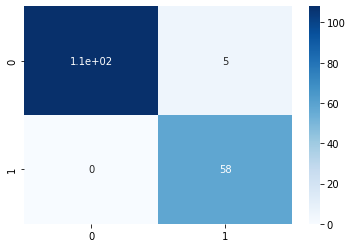

In [33]:
showscores(t_test, pred)